importing libraries, importing dataset and data description

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"F:\LPU\sem 7\Predictive analysis project\archive\dataset.csv")

In [3]:
print(df.head())
print(df.columns)
print(df.info())

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            11400

In [4]:
(df.head())

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


selecting the features and preprocessing

In [5]:
features = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo',
    'key', 'mode', 'time_signature',
    'track_genre'
]
df_features = df[features].copy()
df_features.dropna(inplace=True)

data contains 114 genres which are grouped into 14 categories

In [6]:
def consolidate_genre_improved(genre):
    genre = str(genre).lower()
    if 'rock' in genre: return 'Rock'
    if 'pop' in genre or 'pop-film' in genre: return 'Pop'
    if 'hip-hop' in genre or 'rap' in genre: return 'Hip-Hop'
    if 'r-n-b' in genre or 'soul' in genre or 'funk' in genre: return 'R&B/Soul/Funk'
    if 'techno' in genre or 'trance' in genre or 'house' in genre or 'edm' in genre or \
       'electro' in genre or 'electronic' in genre or 'dubstep' in genre or \
       'drum-and-bass' in genre: return 'Electronic'
    if 'classical' in genre or 'opera' in genre: return 'Classical'
    if 'jazz' in genre or 'bossanova' in genre: return 'Jazz'
    if 'acoustic' in genre or 'folk' in genre or 'bluegrass' in genre: return 'Folk/Acoustic'
    if 'metal' in genre: return 'Metal'
    if 'latin' in genre or 'latino' in genre or 'salsa' in genre or 'samba' in genre or \
       'reggaeton' in genre: return 'Latin'
    if 'reggae' in genre or 'ska' in genre: return 'Reggae/Ska'
    if 'indie' in genre: return 'Indie'
    if 'world-music' in genre or 'indian' in genre or 'malay' in genre or 'mandopop' in genre or \
       'j-pop' in genre or 'k-pop' in genre or 'turkish' in genre: return 'World Music'
    return 'Other'
df_features['consolidated_genre'] = df_features['track_genre'].apply(consolidate_genre_improved)
df_model = df_features.drop('track_genre', axis=1)
df_clean = df_model[df_model['consolidated_genre'] != 'Other']

EDA

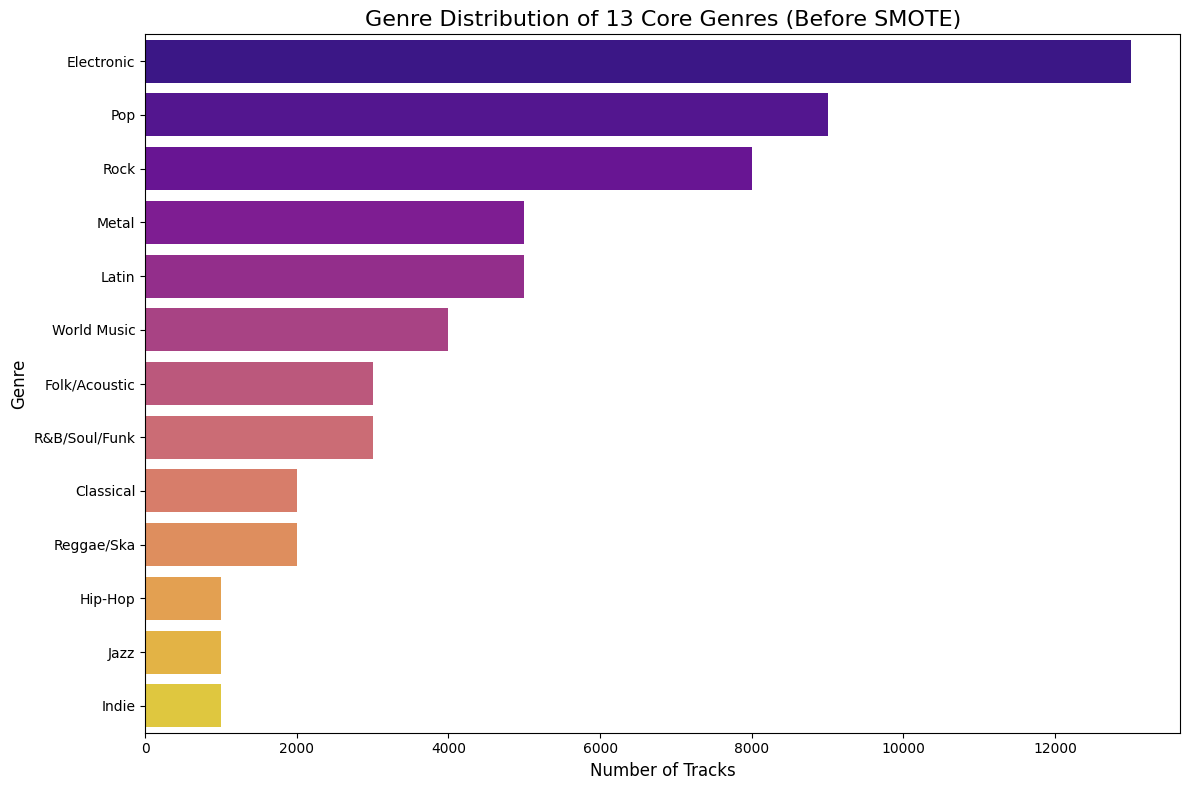

In [7]:
plt.figure(figsize=(12, 8))
sns.countplot(y='consolidated_genre', data=df_clean, order=df_clean['consolidated_genre'].value_counts().index, palette='plasma')
plt.title('Genre Distribution of 13 Core Genres (Before SMOTE)', fontsize=16)
plt.xlabel('Number of Tracks', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()

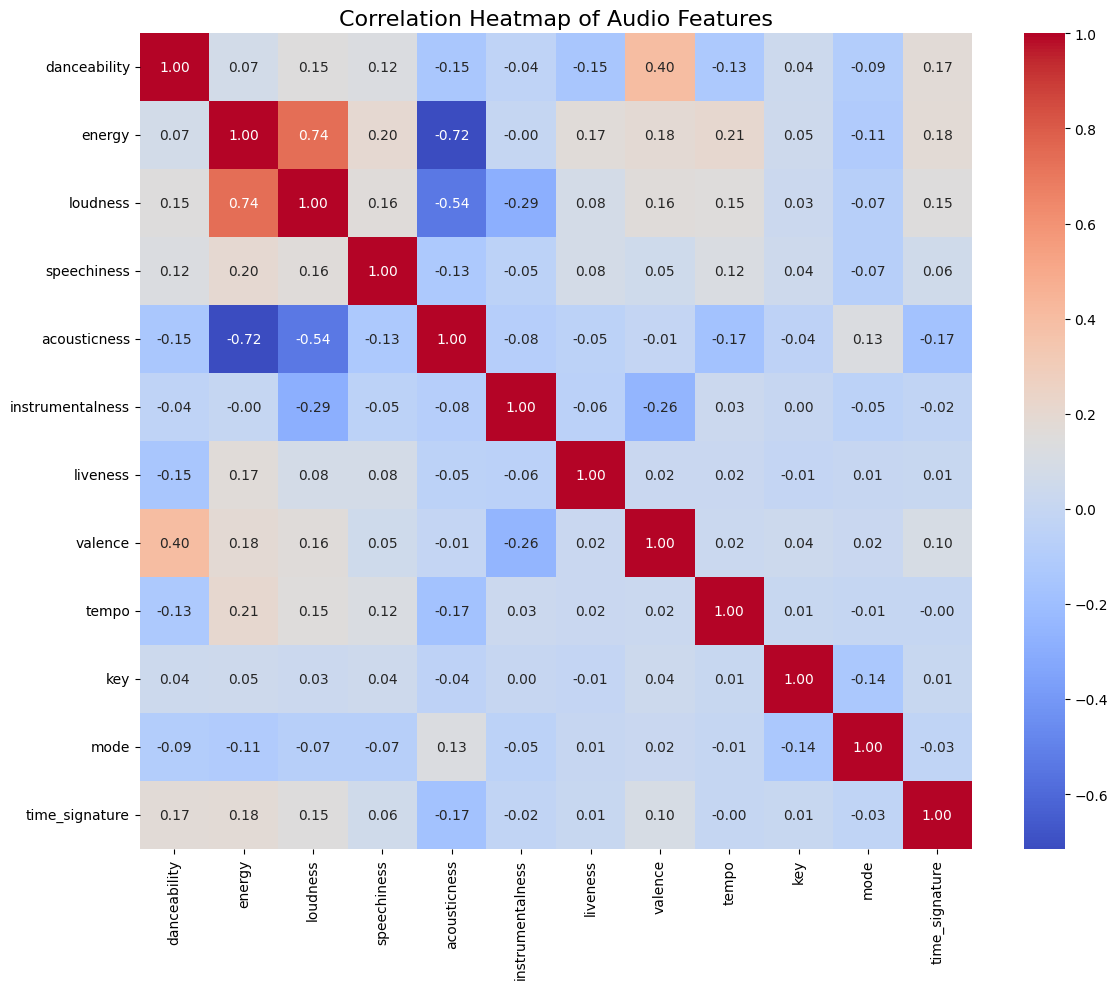

In [8]:
plt.figure(figsize=(12, 10))
numeric_cols = df_clean.select_dtypes(include=['number']).columns
sns.heatmap(df_clean[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Audio Features', fontsize=16)
plt.tight_layout()

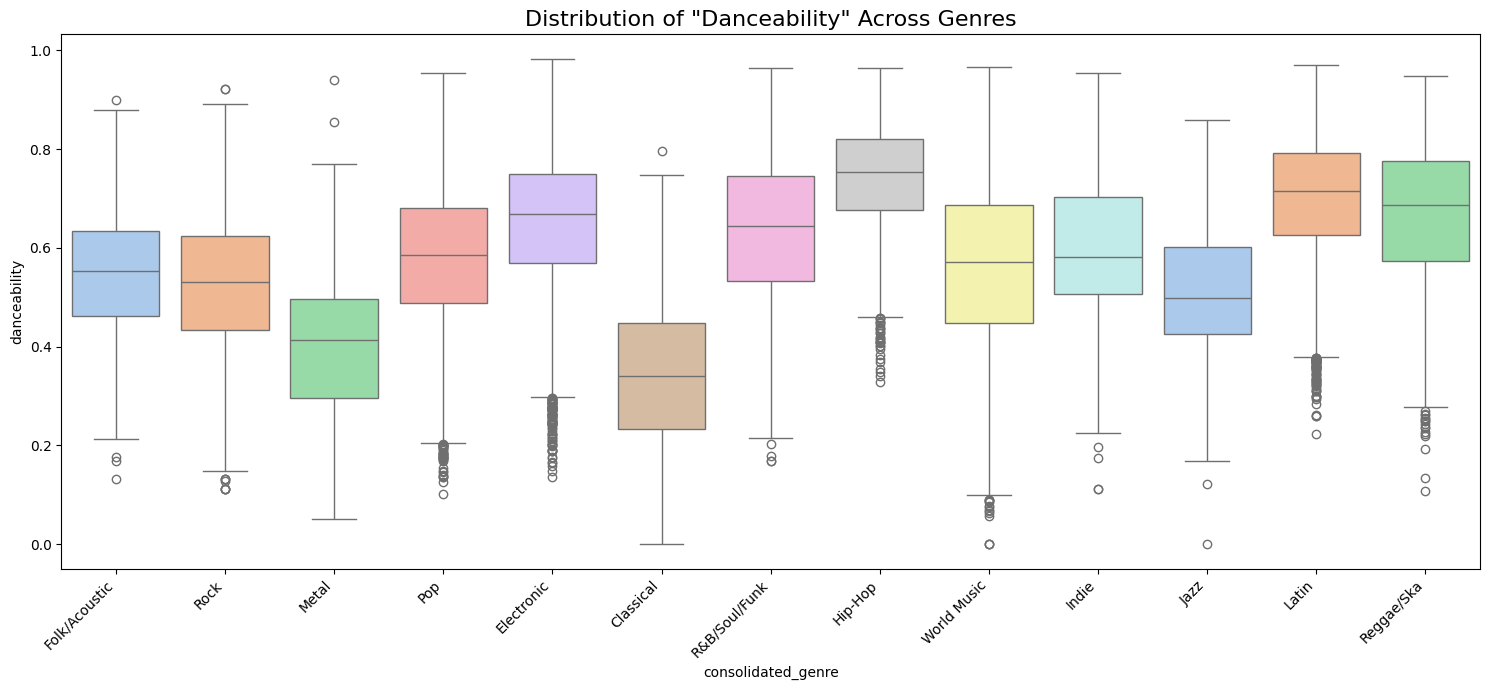

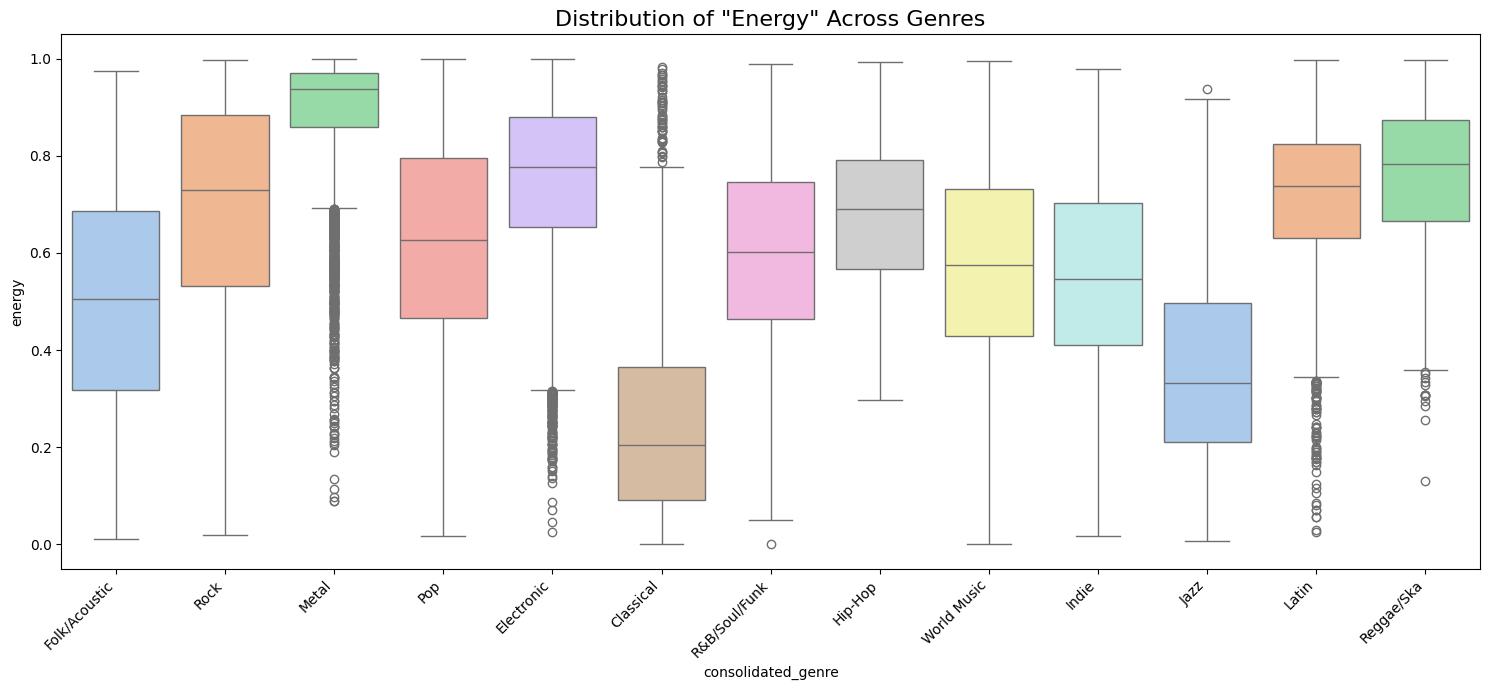

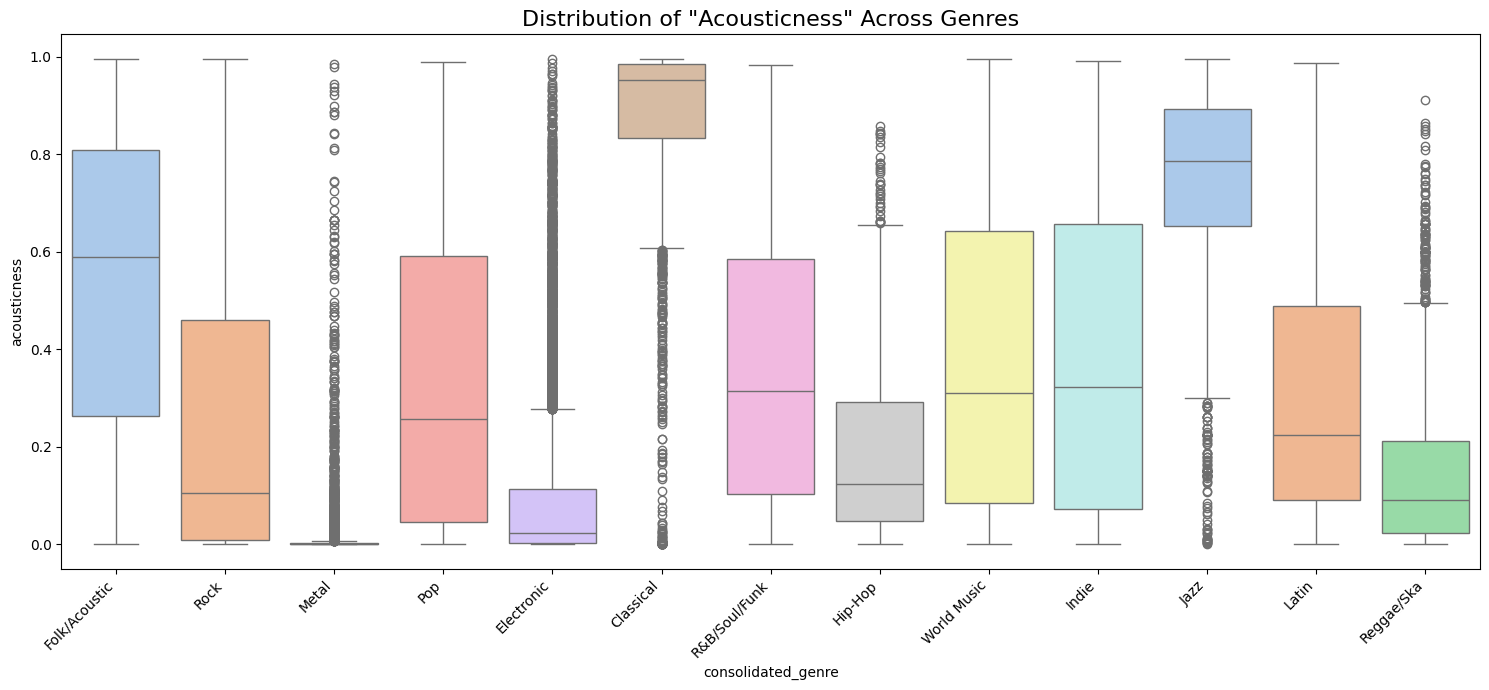

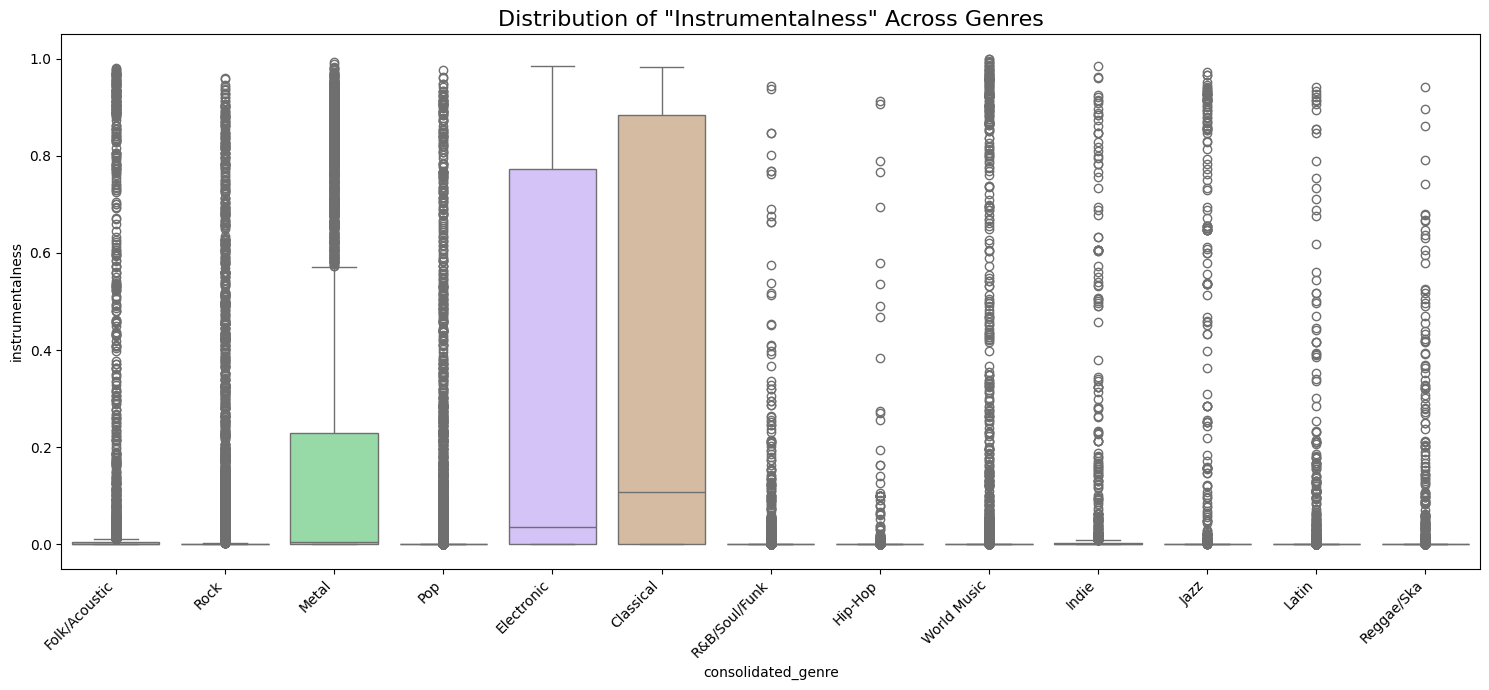

In [9]:
key_features = ['danceability', 'energy', 'acousticness', 'instrumentalness']

for feature in key_features:
    plt.figure(figsize=(15, 7))
    sns.boxplot(x='consolidated_genre', y=feature, data=df_clean, palette='pastel')
    plt.title(f'Distribution of "{feature.capitalize()}" Across Genres', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

feature engineering and label encoding

In [10]:
X = df_clean.drop('consolidated_genre', axis=1)
y = df_clean['consolidated_genre']

In [11]:
X = pd.get_dummies(X, columns=['key', 'mode', 'time_signature'])

In [12]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

splitting data into training and testing

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

Scaling the features

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

oversampling the minority using SMOTE

In [15]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

training the model

In [16]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

In [17]:
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [18]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

In [19]:
print(f"Overall Accuracy: {accuracy:.2%}\n")
print("Classification Report:\n")
print(report)

Overall Accuracy: 54.65%

Classification Report:

               precision    recall  f1-score   support

    Classical       0.63      0.77      0.69       400
   Electronic       0.84      0.78      0.81      2600
Folk/Acoustic       0.36      0.44      0.40       600
      Hip-Hop       0.24      0.40      0.30       200
        Indie       0.10      0.16      0.12       200
         Jazz       0.48      0.62      0.54       200
        Latin       0.57      0.66      0.61      1000
        Metal       0.67      0.79      0.72      1000
          Pop       0.49      0.37      0.43      1800
R&B/Soul/Funk       0.45      0.42      0.44       600
   Reggae/Ska       0.16      0.18      0.17       400
         Rock       0.50      0.45      0.47      1600
  World Music       0.34      0.30      0.32       800

     accuracy                           0.55     11400
    macro avg       0.45      0.49      0.46     11400
 weighted avg       0.56      0.55      0.55     11400



In [20]:
import pickle

In [21]:
model_filename = 'spotify_genre_model.pkl'

In [22]:
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)
print(f" Model successfully saved as '{model_filename}'")

 Model successfully saved as 'spotify_genre_model.pkl'


In [23]:
X_test_first_song = X_test_scaled[0].reshape(1, -1)
y_test_first_song_encoded = y_test[0]
prediction = model.predict(X_test_first_song)
predicted_genre = le.inverse_transform(prediction)
actual_genre = le.inverse_transform([y_test_first_song_encoded])
print(f"\nModel Prediction: {predicted_genre[0]}")
print(f"Actual Genre:     {actual_genre[0]}")
if predicted_genre[0] == actual_genre[0]:
    print("\n The model is correct!")
else:
    print("\n The model is incorrect.")


Model Prediction: Electronic
Actual Genre:     Electronic

 The model is correct!
